In [2]:
import pandas as pd
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt

In [3]:
from PythonTsa.datadir import getdtapath

In [4]:
#dtapath=getdtapath()
#xxx=pd.read_excel(dtapath + 'xxx.xlsx', header = None)

# Codigo para figura 2.12

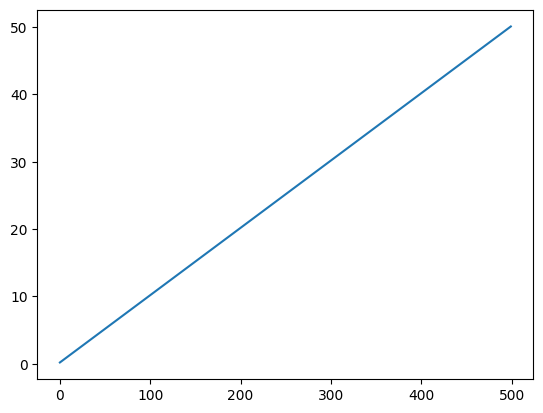

In [7]:
t = np.arange(500)
f_t = 0.2 + 0.1*t
f_t = pd.Series(f_t)
plt.plot(f_t)

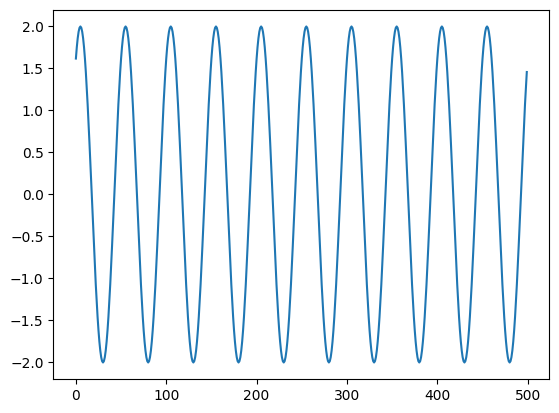

In [10]:
p_t = 2*np.sin(2*np.pi*t/50 + 0.3*np.pi)
p_t = pd.Series(p_t)
plt.plot(p_t)

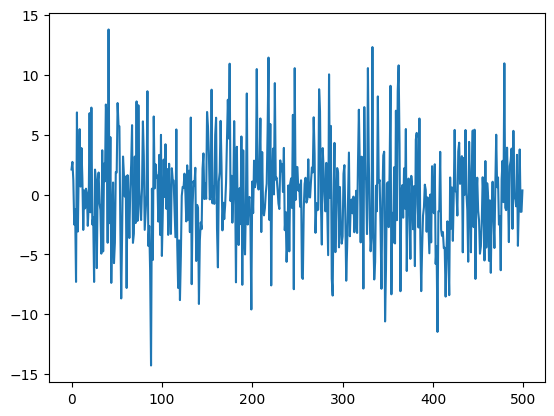

In [15]:
np.random.seed(1356)
x_t = np.random.normal(0,4.2,size=500)
plt.plot(x_t)

Text(0.5, 1.0, 'f_t*p_t*x_t')

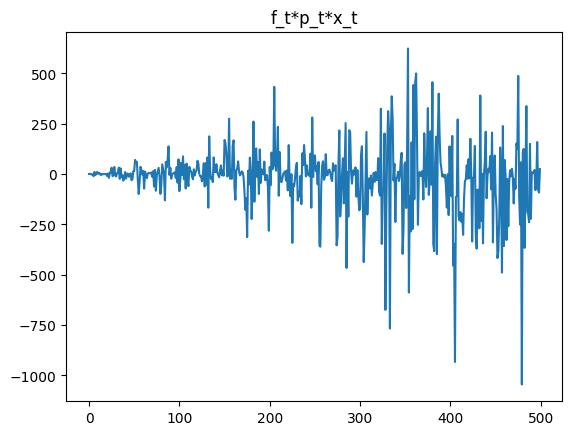

In [20]:
plt.plot(f_t*p_t*x_t)
plt.title('f_t*p_t*x_t')

Text(0.5, 1.0, 'f_t*p_t+x_t')

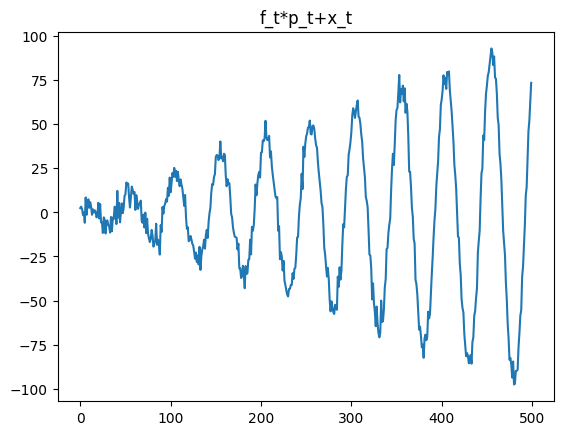

In [21]:
plt.plot((f_t*p_t)+x_t)
plt.title('f_t*p_t+x_t')

Text(0.5, 1.0, 'f_t*x_t + p_t')

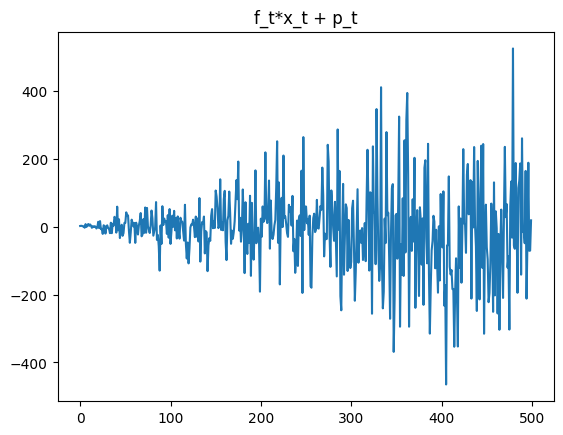

In [23]:
plt.plot(f_t*x_t + p_t)
plt.title('f_t*x_t + p_t')

Text(0.5, 1.0, 'f_t*x_t + p_t')

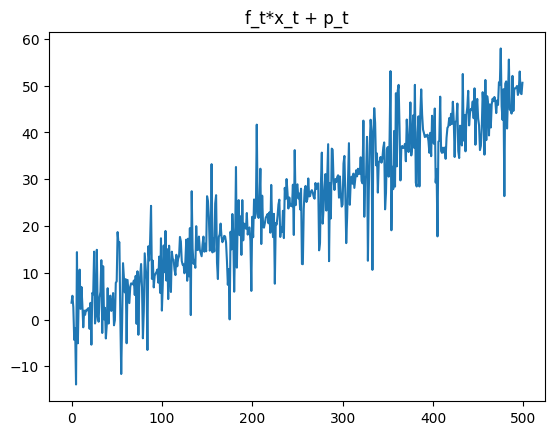

In [24]:
plt.plot(f_t+ x_t*p_t)
plt.title('f_t*x_t + p_t')

Exercicio 3

In [186]:
dtapath=getdtapath()
aue =pd.read_excel(dtapath + 'AustraliaEmployedTotalPersons.xlsx', header = 0)

In [187]:
#vamos fazer uma decomposição multiplicativa da series aue

In [188]:
timeindex = pd.date_range('1978-02', periods = len(aue), freq = 'M')
aue.index = timeindex

In [189]:
auets = aue['EmployedP']

<Axes: >

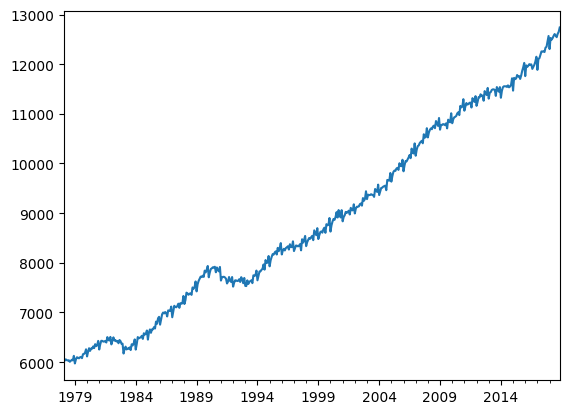

In [190]:
auets.plot()

<Axes: >

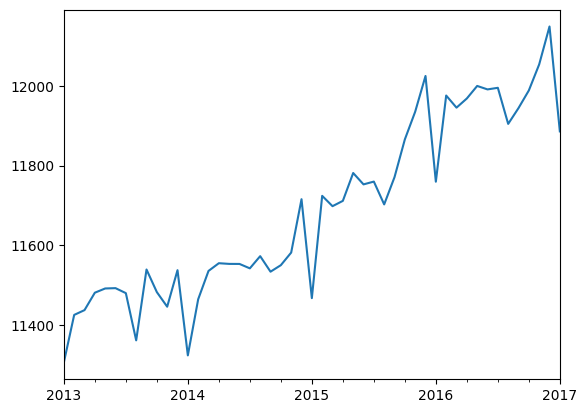

In [191]:
auets['2013-01':'2017-01'].plot()

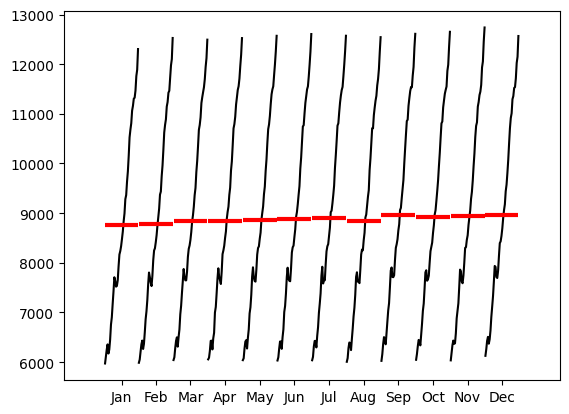

In [192]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(auets)
plt.show()

In [193]:
from statsmodels.tsa.seasonal import seasonal_decompose

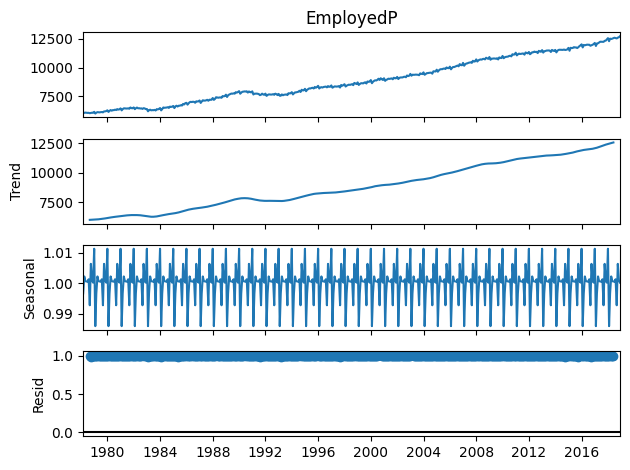

In [194]:
auest_dec = seasonal_decompose (auets, model = 'multiplicative') #multiplicative
auest_dec.plot()
plt.show()

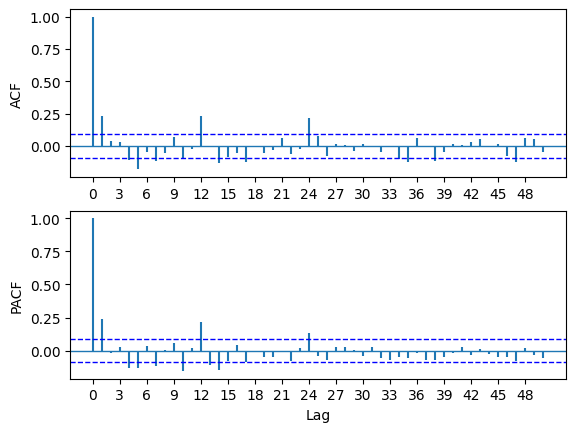

In [195]:
auest_dec_resid = auest_dec.resid.dropna()
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(auest_dec_resid, both=True, lag=50)

In [196]:
ar = auest_dec_resid
rolm = pd.Series.rolling(ar, window=36, center = True).mean()
rolstd = pd.Series.rolling(ar, window=36, center = True).std()

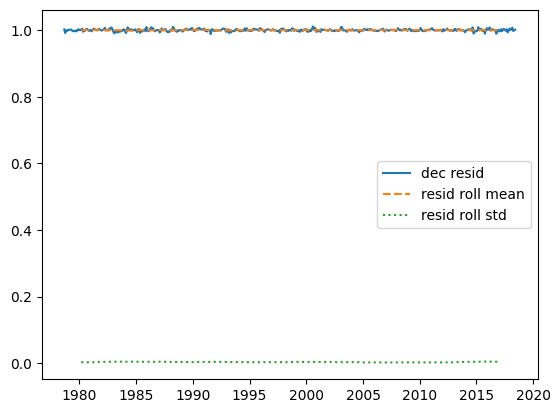

In [197]:
plt.plot(auest_dec_resid, label = 'dec resid')
plt.plot(rolm, label = 'resid roll mean', linestyle = '--')
plt.plot(rolstd, label = 'resid roll std', linestyle = ':')
plt.legend()
plt.show()

Excercico 2.4

In [198]:
import os
dtapath = getdtapath()
arquivos = os.listdir(dtapath)
for arquivo in arquivos:
    print(arquivo)

AntidiabeticDrugSales.csv
areturns.csv
AustraliaEmployedTotalPersons.xlsx
AustraliaUnemployedTotalPersons.xlsx
BitcoinPrice17-6-23-18-6-22.xlsx
chaos.csv
DAX.csv
DAXlogret.csv
dlGDPukcaus1q1980.csv
EconGermany.dat
elec-temp.csv
ExchRate NZ per UK.txt
gdpquarterlychina1992.1-2017.4.csv
Global mean surface air temp changes 1880-1985.csv
GlobalTemperature.txt
h02July1991June2008.csv
IBM.csv
ibmlogret.csv
milk.xlsx
monthly returns of PG stock 1961 to 2016.csv
monthly returns of Procter n Gamble stock n 3 market indexes 1961 to 2016.csv
nao.csv
Noboyngirl.csv
realGdpConsInv.csv
RwalkwDrift0.3.csv
Southtemperature.txt
SP500dailyreturns.csv
us-q-rgdp.csv
USbill.csv
USEconomicChange.csv
USFemalesAged20+Job1948-81.csv
usFOI.csv
usGDPnotAdjust.csv
USmacronInRate.txt
USQgdpunemp.csv
WTI-Brent.csv
Yearly mean total sunspot number 1700 - 2017.csv


In [199]:
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
china =pd.read_csv(dtapath + 'BitcoinPrice17-6-23-18-6-22.xlsx', header = 0)

In [200]:
timeindex = pd.date_range('1992-01', periods = len(china), freq = 'Q' )
china.index = timeindex

In [132]:
china_rol3 = pd.Series.rolling(china, window=3, center = True).mean(3)
china_rol12 = pd.Series.rolling(china, window=12, center = True).mean(12)

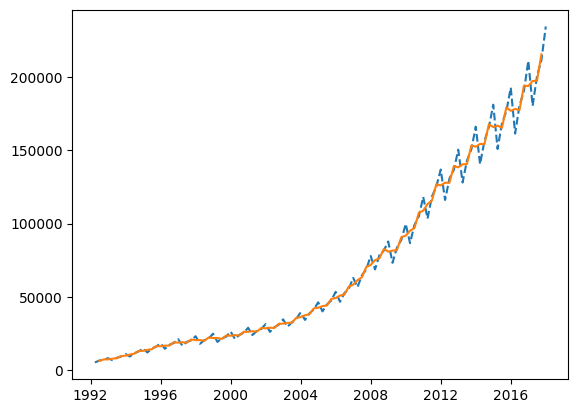

In [133]:
plt.plot(china, linestyle = '--')
plt.plot(china_rol3)

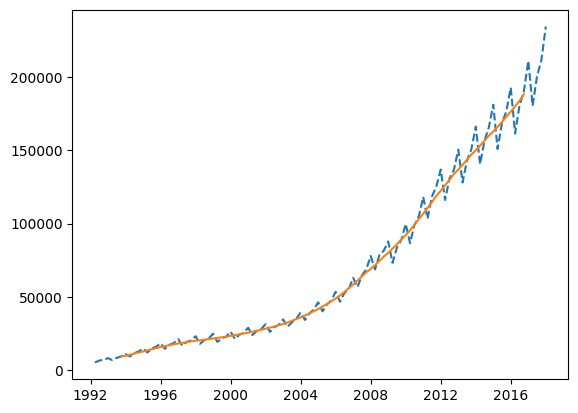

In [134]:
plt.plot(china, linestyle = '--')
plt.plot(china_rol12)

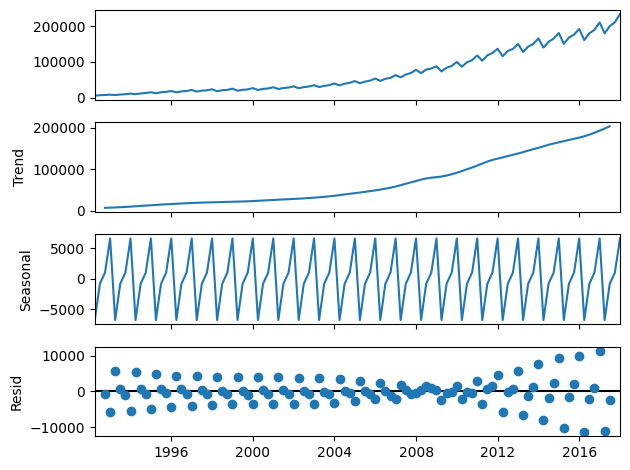

In [142]:
china_seasonadt = seasonal_decompose(china, model = 'aditive', period = 4)
china_seasonadt.plot()
plt.show()

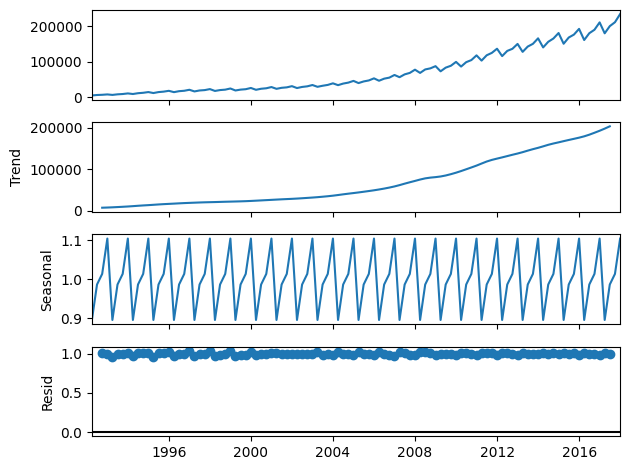

In [143]:
china_seasonadt = seasonal_decompose(china, model = 'multiplicative', period = 4)
china_seasonadt.plot()
plt.show()

Temos resultados que mostram estacionaridade na media mas não na variância. Parece que a sasonaliade mostra o gdp chiens é maior nos ultimos trimestre, sendo crescente 1<2<3<4 trismestre

# 2.7

vamos fazer uma analise exploratoria dos dados de emprego na australia

<Axes: >

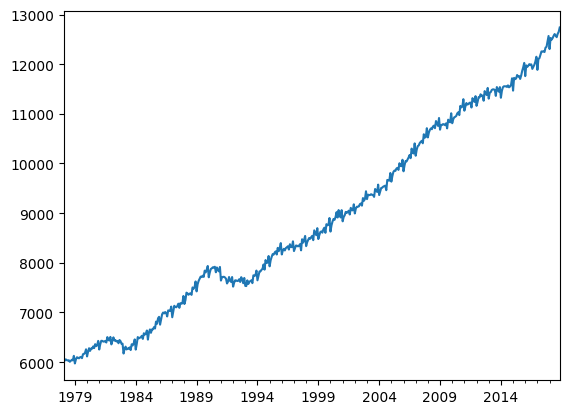

In [145]:
auets.plot()

<Figure size 1200x800 with 0 Axes>

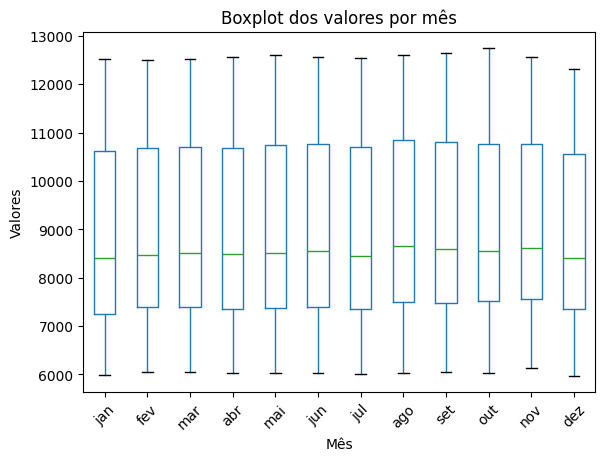

In [201]:
# Criar um índice de datas mensais
dates = pd.date_range(start='1970-01', periods=490, freq='M')

# Criar um DataFrame com os dados
emp_p = pd.DataFrame({'value': auets.values}, index=dates)

# Adicionar uma coluna para os meses
emp_p['month'] = emp_p.index.month

# Mapeamento dos números dos meses para os nomes dos meses
month_names = {1: 'jan', 2: 'fev', 3: 'mar', 4: 'abr', 5: 'mai', 6: 'jun',
               7: 'jul', 8: 'ago', 9: 'set', 10: 'out', 11: 'nov', 12: 'dez'}
emp_p['month_name'] = emp_p['month'].map(month_names)

# Garantir que os meses estejam em ordem cronológica
emp_p['month_name'] = pd.Categorical(emp_p['month_name'], 
                                     categories=['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 
                                                 'jul', 'ago', 'set', 'out', 'nov', 'dez'], 
                                     ordered=True)

# Criar o boxplot
plt.figure(figsize=(12, 8))
emp_p.boxplot(column='value', by='month_name', grid=False)
plt.title('Boxplot dos valores por mês')
plt.suptitle('')  # Remover o título padrão que o pandas adiciona
plt.xlabel('Mês')
plt.ylabel('Valores')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()


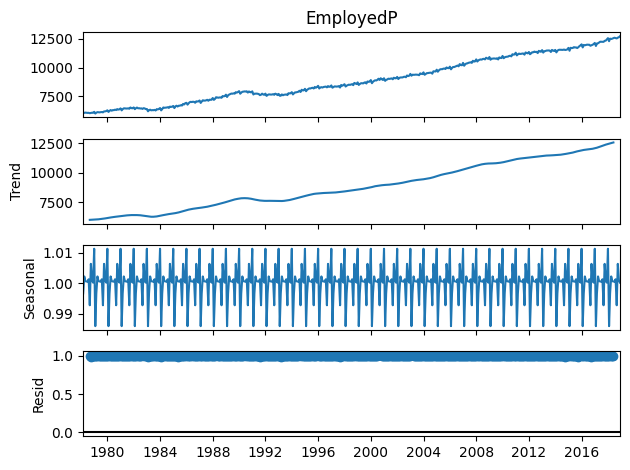

In [202]:
auest_dec.plot()
plt.show()

In [209]:
auets_dec_season = auest_dec.seasonal

In [243]:
auets

1978-02-28     5985.659716
1978-03-31     6040.560795
1978-04-30     6054.213859
1978-05-31     6038.264751
1978-06-30     6031.342299
                  ...     
2018-07-31    12572.476450
2018-08-31    12544.050377
2018-09-30    12611.208888
2018-10-31    12652.024422
2018-11-30    12739.197113
Freq: M, Name: EmployedP, Length: 490, dtype: float64

In [240]:
auets_nonseason = auets + (1 - auets_dec_season)*auets
auets_nonseason

1978-02-28     6005.447158
1978-03-31     6026.816861
1978-04-30     6049.795585
1978-05-31     6034.329688
1978-06-30     6028.062774
                  ...     
2018-07-31    12555.411335
2018-08-31    12634.266848
2018-09-30    12530.328422
2018-10-31    12639.886846
2018-11-30    12736.125063
Freq: M, Length: 490, dtype: float64

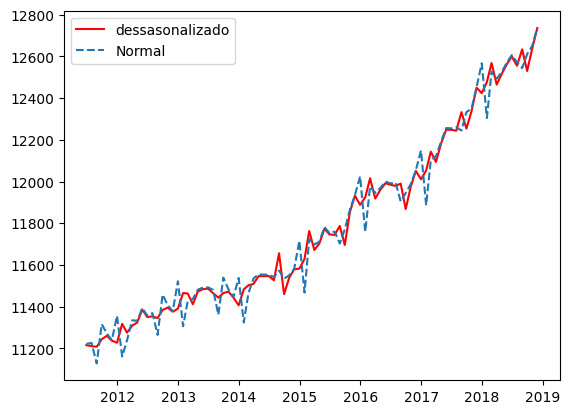

In [253]:
auets_nonseason = auets + (1 - auets_dec_season)*auets
plt.plot(auets_nonseason[400::], color = 'red', label = 'dessasonalizado')
plt.plot(auets[400::], label = 'Normal', linestyle = '--')
plt.legend()
plt.show()

# 2.9

In [258]:
bitcoin =pd.read_excel(dtapath + 'BitcoinPrice17-6-23-18-6-22.xlsx', header = 0)
bitcoin

,Time,ClosingP,OpenP,High,Low,Volume,Rate
0,42909,2674.9,2672.8,2725.30,2652.80,8.14K,0.0008
1,42910,2502.6,2674.9,2700.00,2454.10,16.77K,-0.0644
2,42911,2477.7,2502.6,2595.00,2369.10,18.13K,-0.0099
3,42912,2394.6,2480.0,2510.40,2258.70,36.37K,-0.0335
4,42913,2521.2,2393.5,2524.00,2208.10,33.49K,0.0529
...,...,...,...,...,...,...,...
360,43269,6709.2,6443.5,6826.79,6378.60,26.37K,0.0425
361,43270,6737.5,6711.6,6832.90,6666.20,17.38K,0.0042
362,43271,6760.4,6732.7,6818.20,6560.00,18.71K,0.0034
363,43272,6713.5,6760.0,6787.10,6680.10,10.65K,-0.0069


<Axes: >

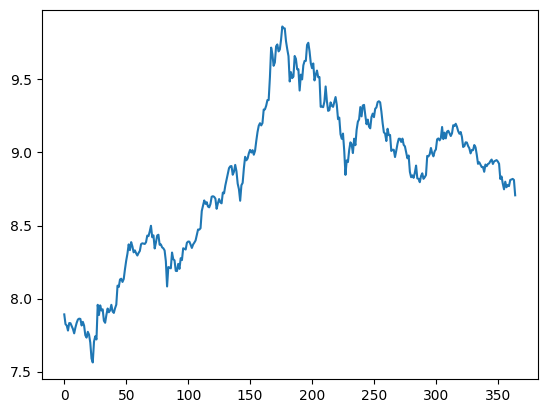

In [286]:
btc = np.log(bitcoin['ClosingP'])
btc.plot()

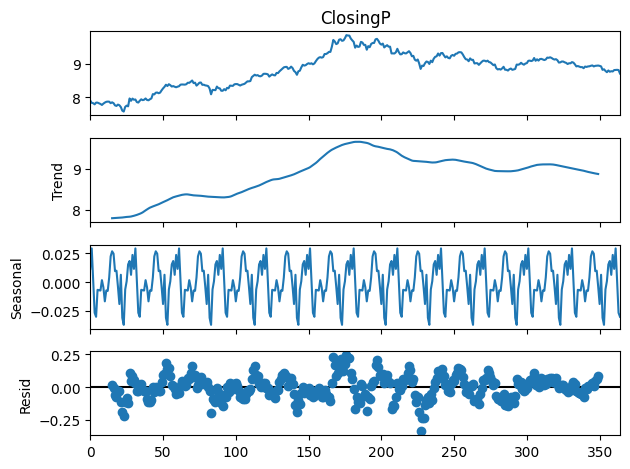

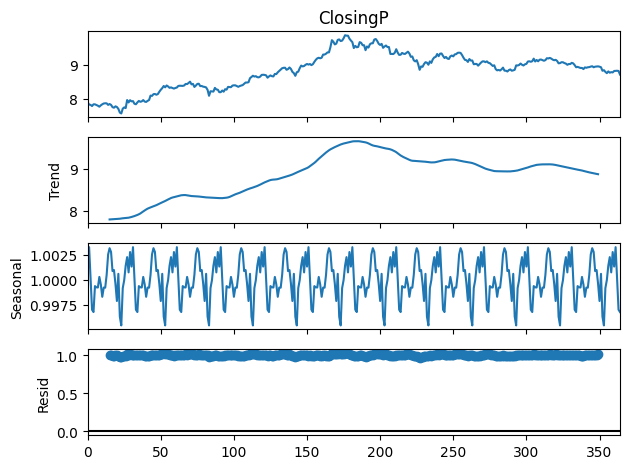

In [291]:
btc_season_m = seasonal_decompose(btc, model = 'multiplicative', period = 30)
btc_season_a = seasonal_decompose(btc, model = 'aditive', period = 30)
btc_season_a.plot()
btc_season_m.plot()
plt.show()

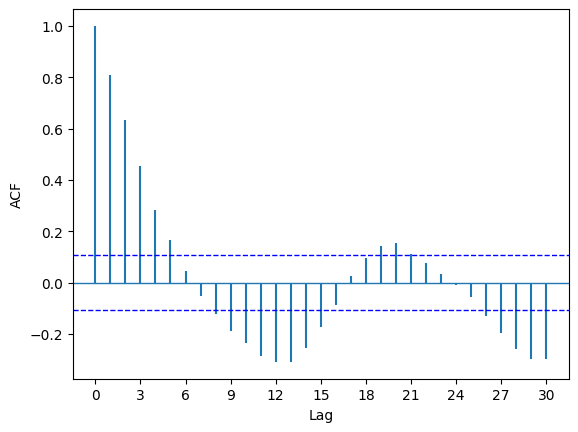

In [292]:
acf_pacf_fig(btc_season_a.resid.dropna())

<Axes: >

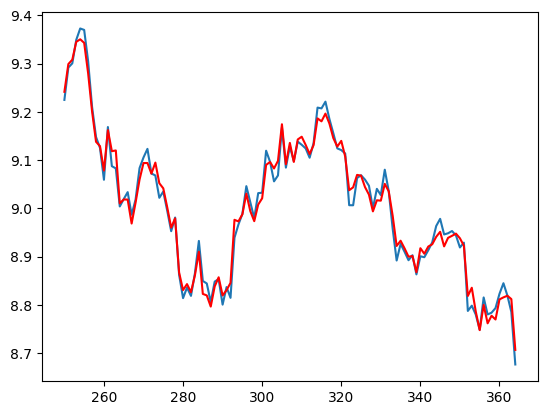

In [293]:
btc_noseason = btc + btc_season_a.seasonal
btc_noseason[250::].plot()
btc[250::].plot(color = 'red')

In [294]:
btc_season_a.seasonal

0      0.011533
1      0.029329
2      0.000372
3     -0.026693
4     -0.030184
         ...   
360    0.011533
361    0.029329
362    0.000372
363   -0.026693
364   -0.030184
Name: seasonal, Length: 365, dtype: float64